# BYU CS 180 Lab 9

In [ ]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from sklearn import datasets
MAX_ITERATIONS = 100

## Introduction:
Say you are given a data set where each observed example has a set of features, but has no labels. Labels are an essential ingredient to a supervised algorithm like Support Vector Machines, which learns a hypothesis function to predict labels given features. So we can't run supervised learning. What can we do?

One of the most straightforward tasks we can perform on a data set without labels is to find groups of data in our dataset which are similar to one another -- what we call clusters.

K-Means is one of the most popular "clustering" algorithms. K-means stores k centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

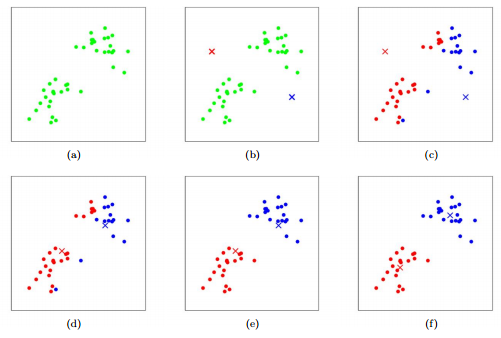

Figure 1: K-means algorithm. Training examples are shown as dots, and cluster centroids are shown as crosses. (a) Original dataset. (b) Random initial cluster centroids. (c-f) Illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by "painting" the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. Images courtesy of Michael Jordan

## Exercise 1: K-an You Do It? Yes You Can!

In the clustering problem, we are given a training set {x_1, x_2, ... x_m} and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point, x_i which real-values, as usual; but no labels y_i (making this an unsupervised learning problem). Our goal is to predict k centroids and a label c_i for each datapoint. The prediction, c_i is a cluster assignment for x_i . At a high level, the k-means clustering algorithm is as follows:



1.   Initialize **cluster centroids** $μ_1, μ_2, μ_3,....μ_k ∈ ℝ^n$ randomly
2.   Repeat until convergence: {


> For every i, set
>> $c^{(i)}:=arg \underset{j}{min} ||x^{(i)} - μ_j ||^2 $

> For every j, set
>> $μ_j := \frac{∑_{i=1}^m 1 \{c^{(i)} = j\} x^{(i)} }{∑_{i=1}^m 1 \{c^{(i)} = j\}} $

}




Functions to Implement:
*   Get Number of Features
*   Get Centroids
*   Get Random Centroids
*   Should Stop
*   Get Labels
*   K Means

### Function: Get Number of Features
Returns the number of features in the dataset. This corresponds to the number of columns in your dataSet array

In [ ]:
def getNumFeatures(dataSet):
  # Find the number of features in the dataset
  numFeatures = dataSet.shape[1]
  return numFeatures

### Function: Get Centroids
Returns k random centroids, each of dimension n. Each centroid is the geometric mean of the points that have that centroid's label.

**Important**: If a centroid is empty (no points have that centroid's label) you should ramdonly re-initialize it.

In [ ]:
def getCentroids(dataSet, labels, k):
  #Compute/randomly initialize centroids
  num = getNumFeatures(dataSet)
  centroids = np.zeros((k,num))

  for i in range(k):# Collect points belonging to the current label
        points = dataSet[labels == i]

        if points.shape[0] > 0: # Compute centroid as the mean of points
            centroids[i] = np.mean(points, axis=0)

        else: # no points for a label, randomly reinitialize the centroid
            centroids[i] = np.random.rand(num)
  #print(centroids)
  return centroids

Function: Get Labels
Returns a label for each piece of data in the dataset. For each element in the dataset, choose the closest centroid. Make that centroid the element's label.

In [ ]:
def getLabels(dataSet, centroids):
  #Assign each datapoint a label in this function according to the centroids
  labels = np.array(np.zeros(dataSet.shape[0])) # initialize labels
  for i in range(dataSet.shape[0]):
     distances = np.linalg.norm(centroids - dataSet[i], axis=1)
     labels[i] = np.argmin(distances)
  return labels

### Function: Get Random Centroids
Randomly initialize the centroids with their corresponding dimensions

In [ ]:
def getRandomCentroids(numFeatures, k):
  centroids = np.random.rand(k, numFeatures)
  return centroids

### Function: Should Stop
Returns True or False if K-Means is done. K-Means terminates either because it has run a maximum number of iterations OR the centroids stop changing.

In [ ]:
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS:
        return True
    else:
      return np.equal(oldCentroids, centroids).all()

### Function: K Means
K-Means is an algorithm that takes in a dataset and a constant k and returns k centroids (which define clusters of data in the dataset which are similar to one another).

In [ ]:
def kmeans(dataSet, k):
    # Initialize centroids randomly
    numFeatures = getNumFeatures(dataSet)
    centroids = getRandomCentroids(numFeatures, k)

    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = None

    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids = centroids
        iterations += 1

        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids)

        # Assign centroids based on datapoint labels
        centroids = getCentroids(dataSet, labels, k)

        plotDataSet(f"Iteration {iterations}", dataSet, labels, centroids)
        plt.show()

    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids

### Plot Function:
Below is a function that plots the dataset with the centroids, it takes in 4 arguments. You will use this function to plot the progress of your K-Means algorithm


1.   title: Graph Title
2.   dataSet: Dataset that's going to be plotted
3.   labels: The labels for the dataset.
4.   centroids: The centroids of the clusters.



In [ ]:
def plotDataSet(title, dataSet, labels, centroids):
  plt.title(title)
  array1 = None
  array2 = None
  array3 = None

  index = 0
  for label in labels:
    if label == 0:
      if array1 is None:
        array1 = dataSet[index]
      else:
        array1 = np.vstack((array1, dataSet[index]))
    if label == 1:
      if array2 is None:
        array2 = dataSet[index]
      else:
        array2 = np.vstack((array2, dataSet[index]))
    if label == 2:
      if array3 is None:
        array3 = dataSet[index]
      else:
        array3 = np.vstack((array3, dataSet[index]))
    index = index + 1
  plt.scatter(array1[:,0], array1[:,1], color="red", s=.2)
  plt.scatter(array2[:,0], array2[:,1], color="green", s=.2)
  plt.scatter(array3[:,0], array3[:,1], color="blue", s=.2)

  plt.scatter(centroids[0][0], centroids[0][1], color="darkred", marker='x', s=50)
  plt.scatter(centroids[1][0], centroids[1][1], color="darkgreen", marker='x', s=50)
  plt.scatter(centroids[2][0], centroids[2][1], color="midnightblue", marker='x', s=50)
  plt.show()

## Exercise 2
Generate a dataset called blobs with the following code:

In [ ]:
 from sklearn import datasets
 n_samples = 1500
 blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

* Run your kmeans algorithm on this dataset with k=3

* Show a scatter plot after iteration 0:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after iteration 9, if the algorithm converges before 9, don't worry about plotting the 9th plot:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after algorithm has terminated

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)


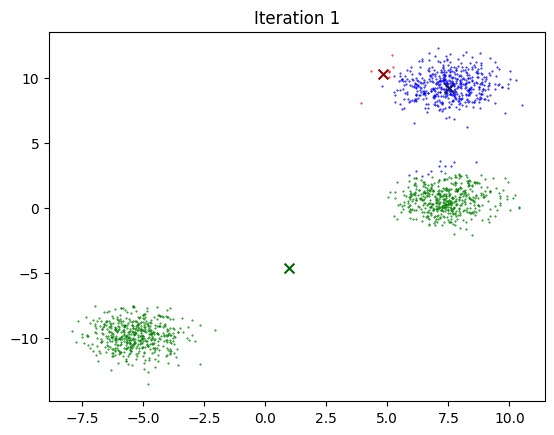

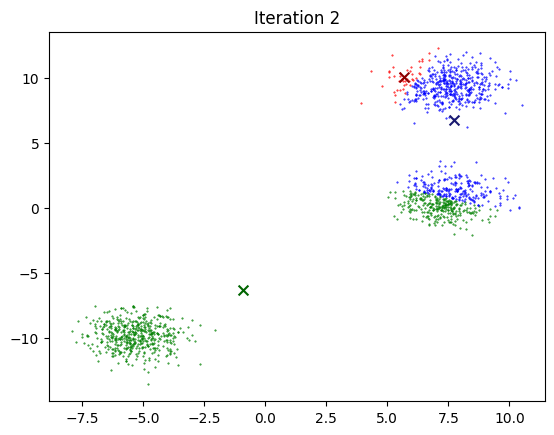

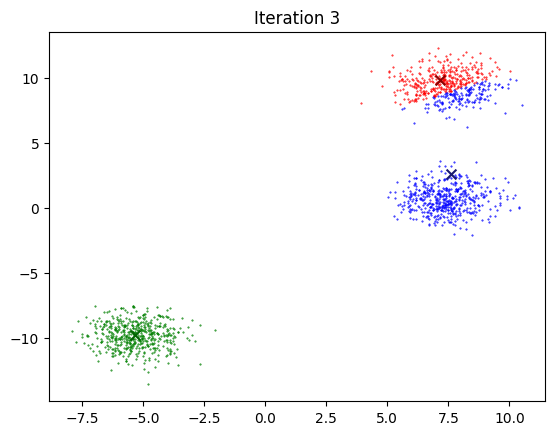

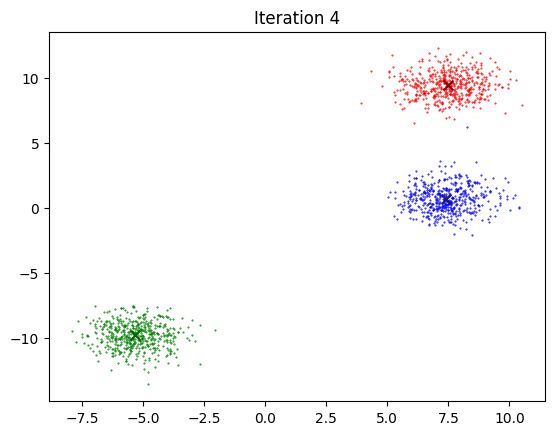

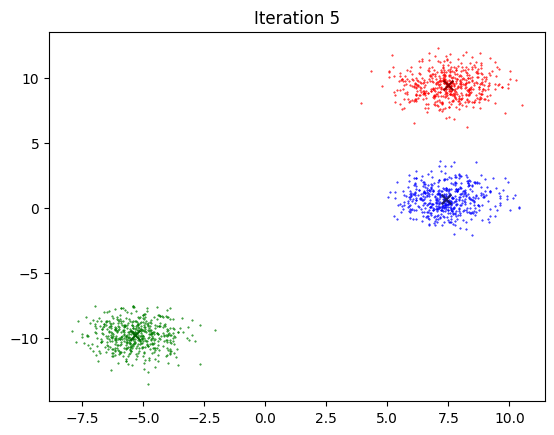

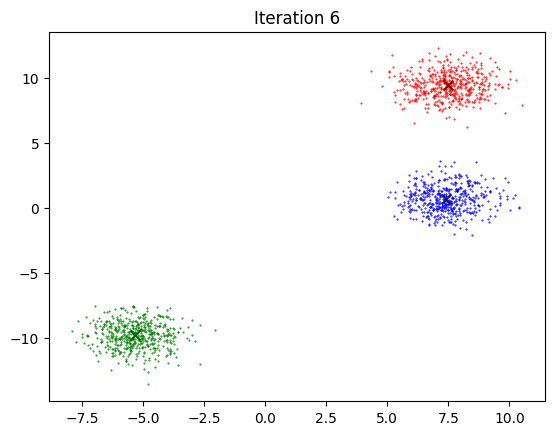

In [ ]:
resulting_centroids = kmeans(blobs, 3)

What do you notice about the predicted clusters as algorithm progresses?

The predicted clusters got closser and closer to where we would expect them as the centroids got closer to the center of the clusters.

Does the number of centroids, k=3 fit the data?

yes, With the three given groups in the data k = 3 is a good fit.

Discuss the quality of the clustering.

The data is pretty well clusted so the predicted groups turned out well.

## Exercise 3
Generate a dataset called noisy moons with the following code:

In [ ]:
from sklearn import datasets
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)[0]

* Run your kmeans algorithm on this dataset with k=3

* Show a scatter plot after iteration 0:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after iteration 9:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after algorithm has terminated

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)


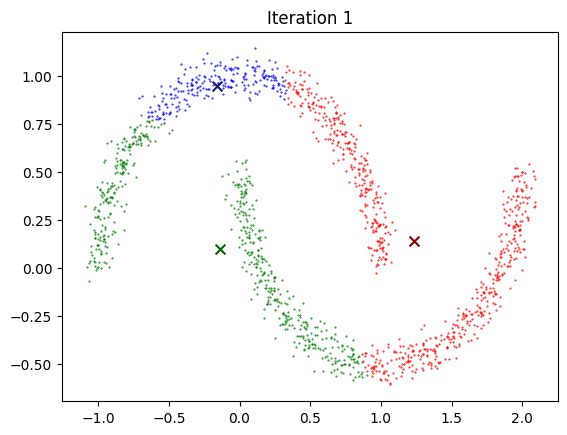

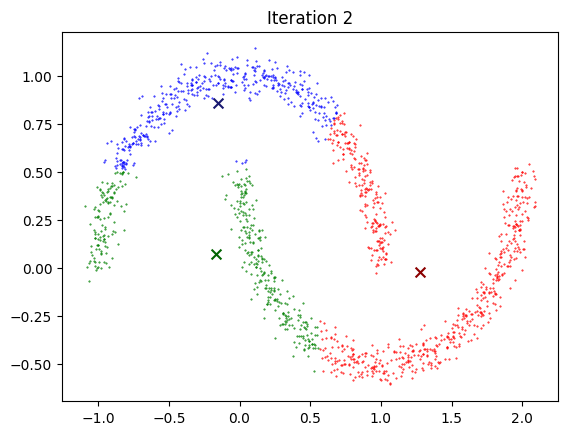

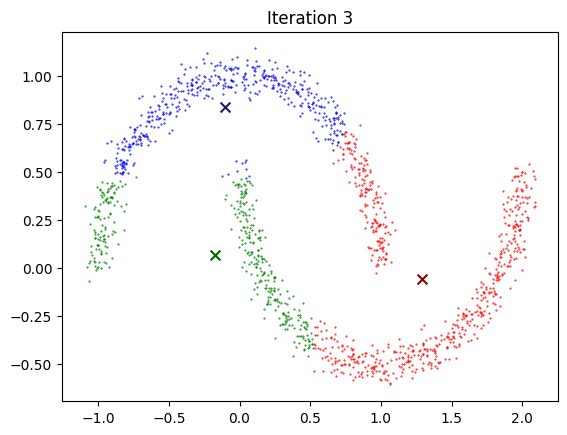

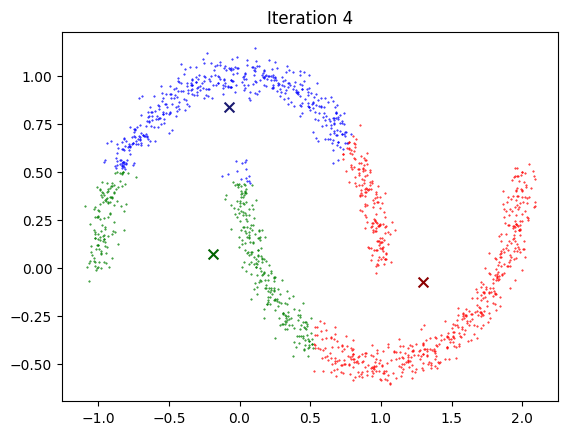

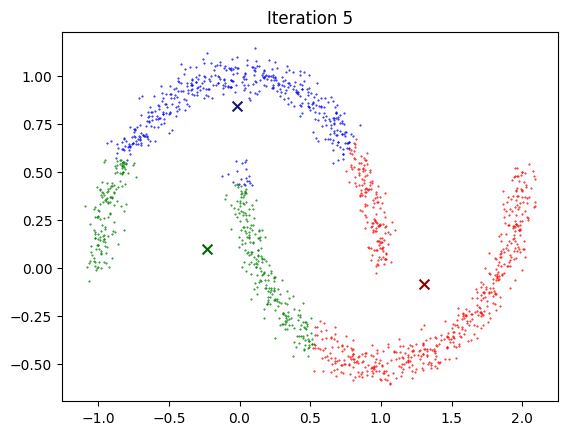

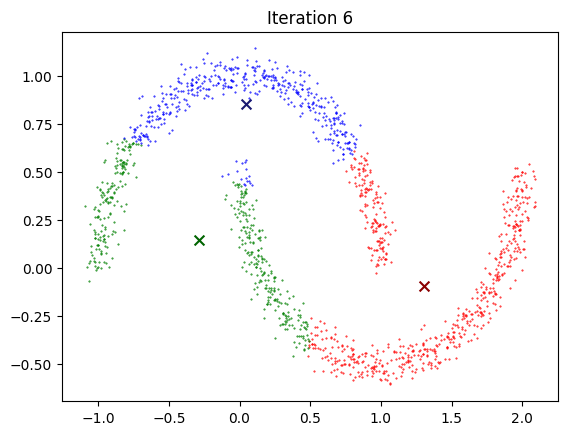

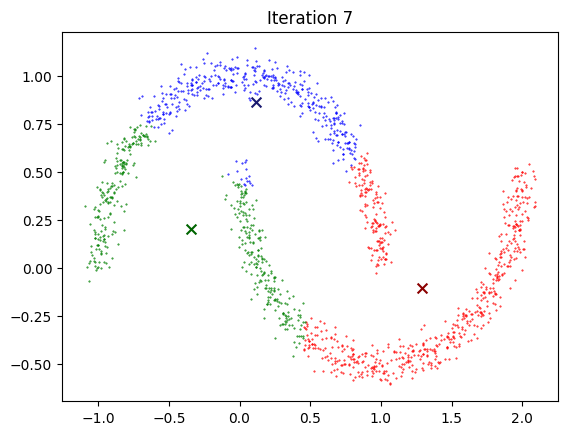

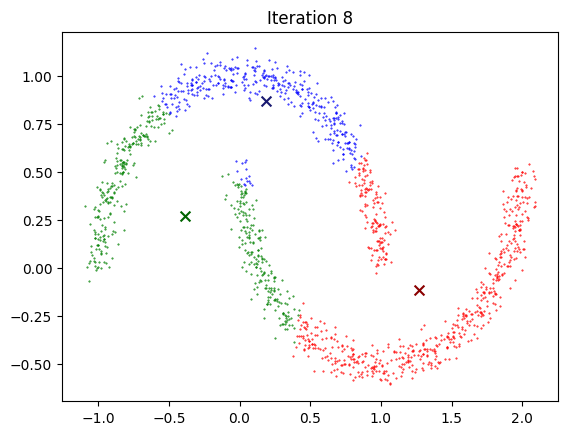

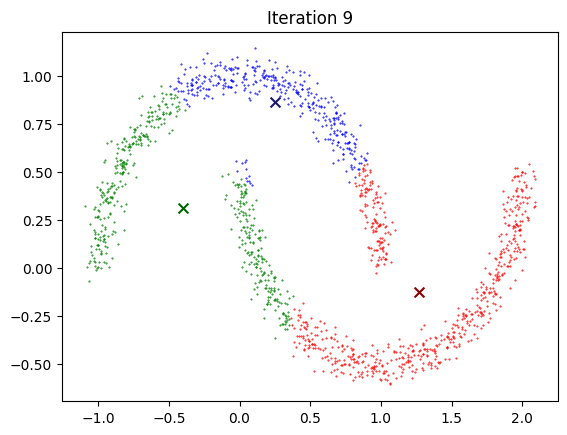

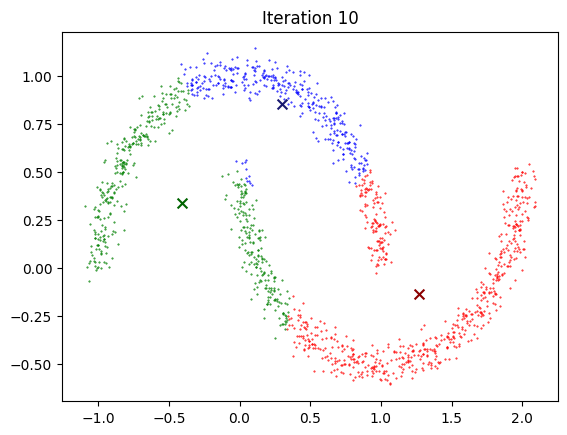

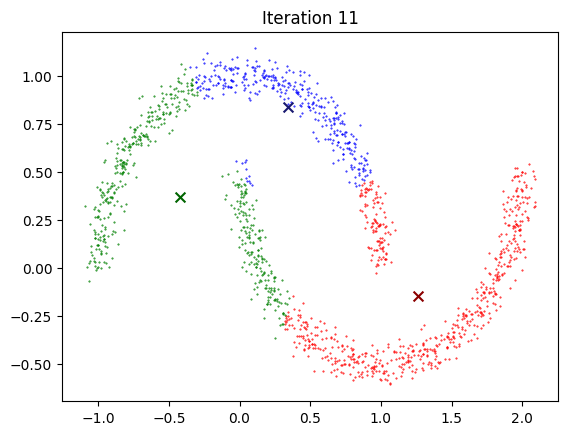

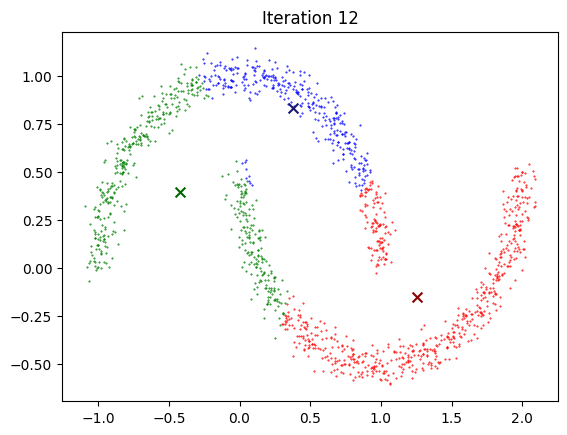

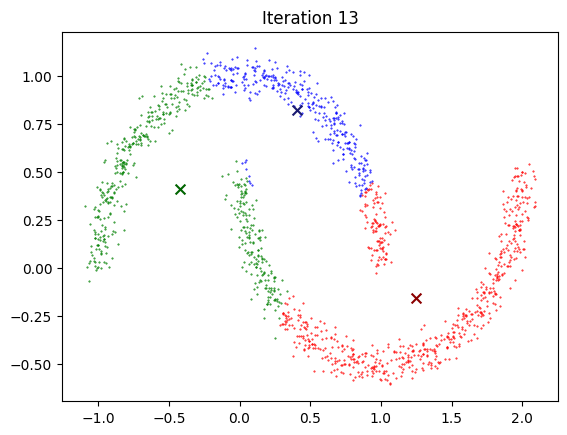

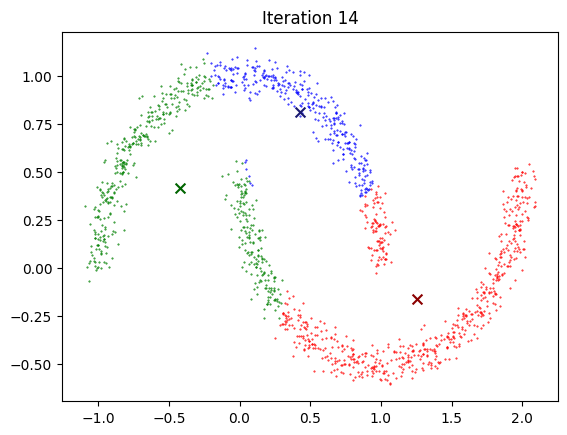

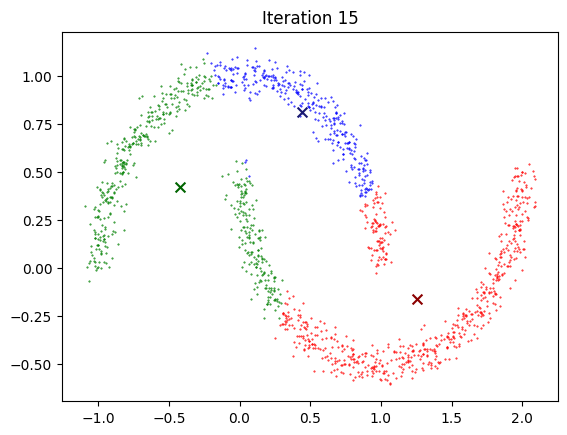

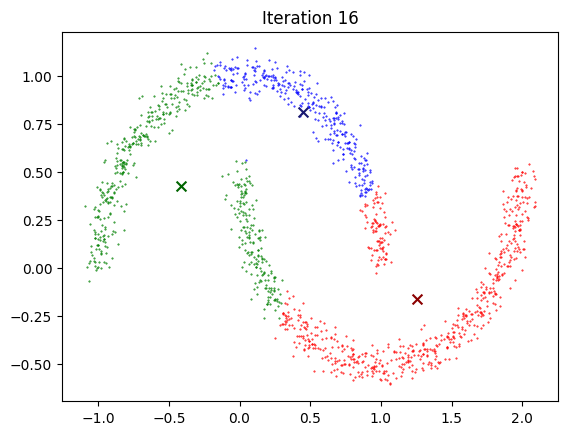

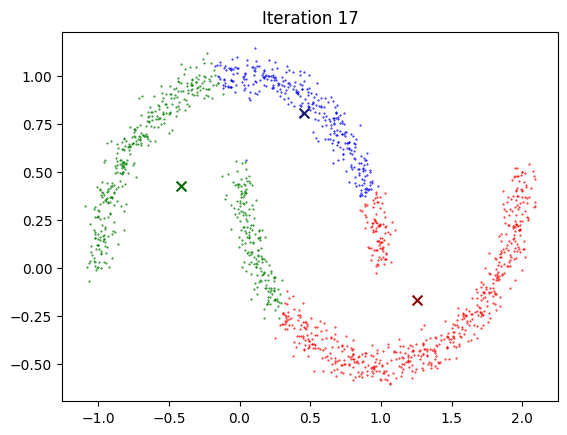

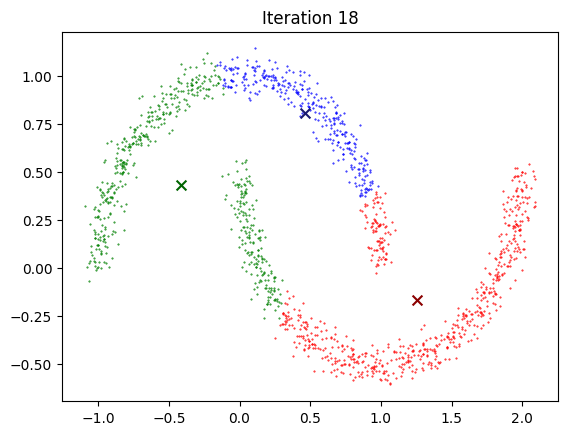

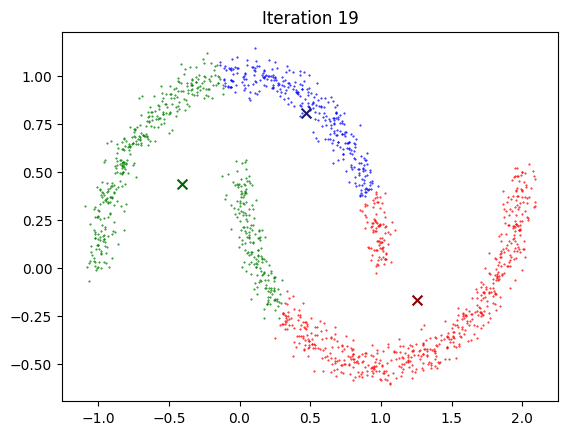

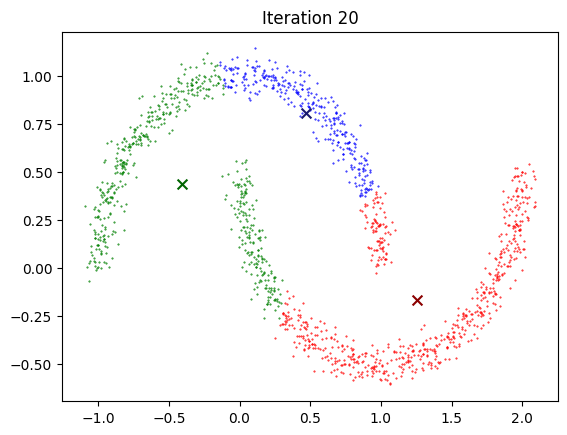

In [ ]:
resulting_centroids = kmeans(noisy_moons, 3)

What do you notice about the predicted clusters as algorithm progresses?

The data does seem to be split into three groups, however they move a lot and dont tend to fit the data very well.

Does the number of centroids, k=3 fit the data?

3 is not a good fit for this data. There appears to be 2 sets of data and k = 3 doesn't fit the data well.

Discuss the quality of the clustering.

The quality of clustering is not great for this data. A different type of clustering is going to be a better fit for this data.

## Exercise 4
Discuss what you learned below

Similar to gradient decent the code was able to split the data to find the best output. This took the data and repeatedly attempted to reduce the error between the cluster points and where the data was located.